#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#### Data Cleaning

In [6]:
#drop unrelated/blank columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99


In [8]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# drop null values
df.dropna(inplace=True)

In [10]:
df.shape

(11239, 13)

In [11]:
df['Amount'] = df['Amount'].astype('int32')

In [12]:
df.rename(columns = {'Marital_Status' : 'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis (EDA)

### Gender

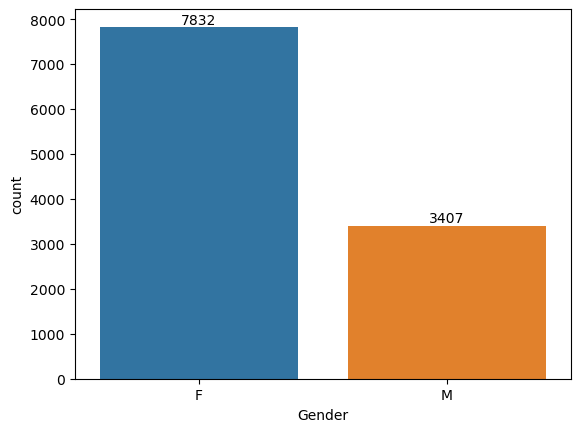

In [15]:
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers: #To get the value-labels in the plot
    ax.bar_label(bars)

In [16]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


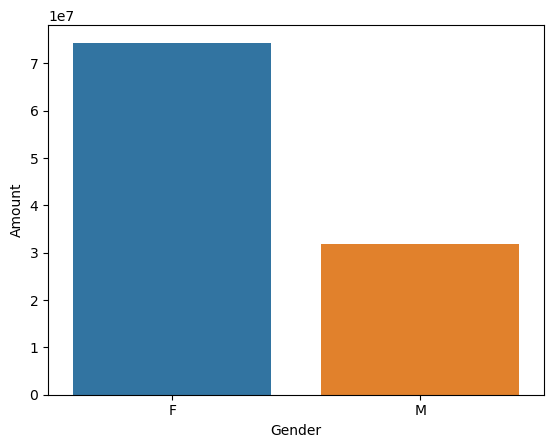

In [17]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
b = sns.barplot(x='Gender',y='Amount',data=sales_gen)

##### Insight : From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.

### Age

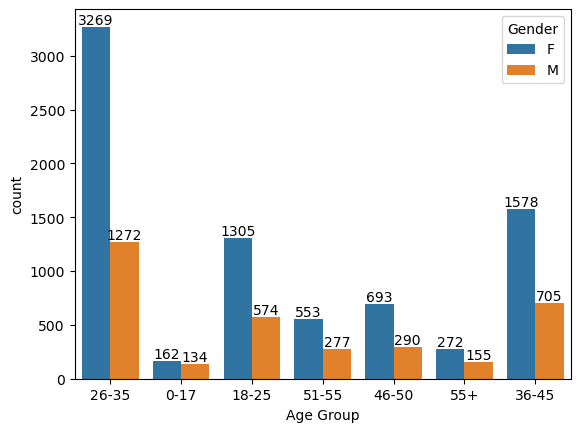

In [18]:
ax = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')
for bars in ax.containers: #To get the value-labels in the plot
    ax.bar_label(bars)

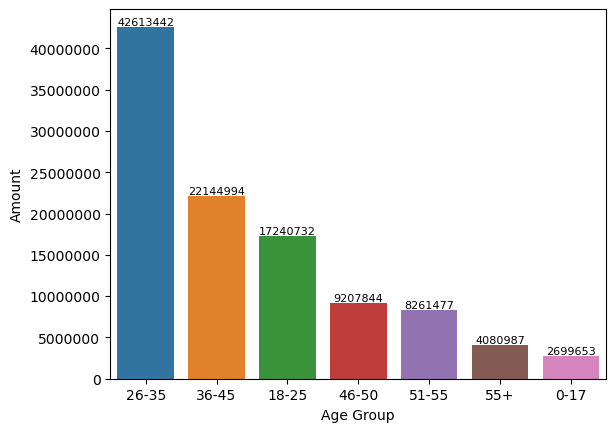

In [19]:
sales_gen = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
b = sns.barplot(x='Age Group',y='Amount',data=sales_gen)
b.ticklabel_format(style='plain', axis='y')
for bars in b.containers: #To get the value-labels in the plot
    b.bar_label(bars, fontsize='8', fmt='%d') #fmt - to give the format of label - scientific/normal

#### Insight : From above graphs we can see that most of the buyers are of age group between 26-35 and females

### State

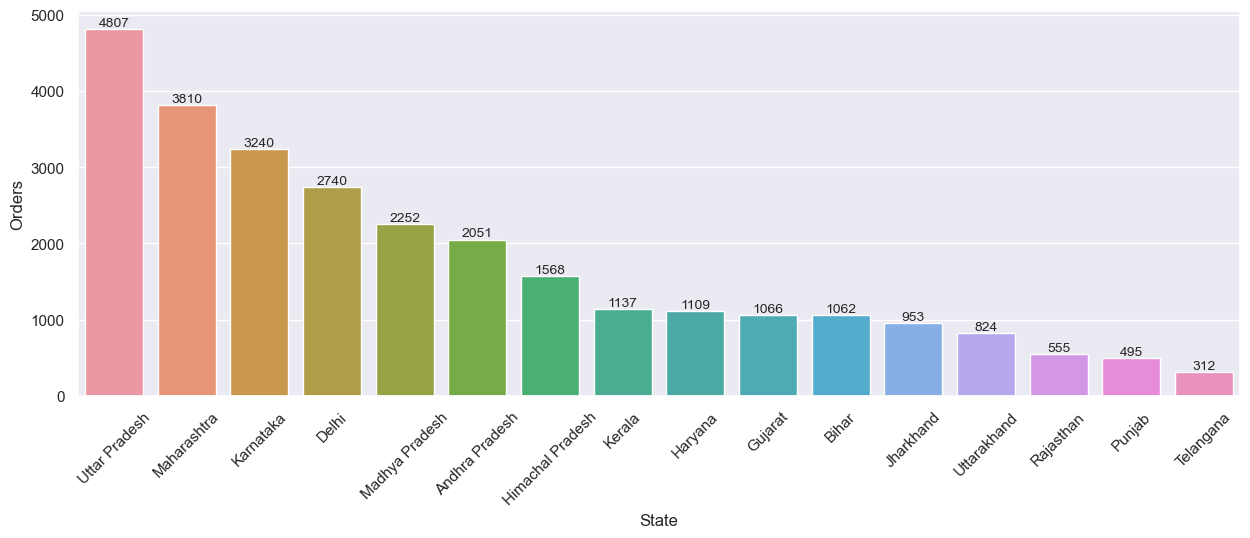

In [20]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
b = sns.barplot(data = sales_state, x = 'State', y = 'Orders')
for item in b.get_xticklabels():
    item.set_rotation(45)
for bars in b.containers: #To get the value-labels in the plot
    b.bar_label(bars, fontsize='10', fmt='%d')

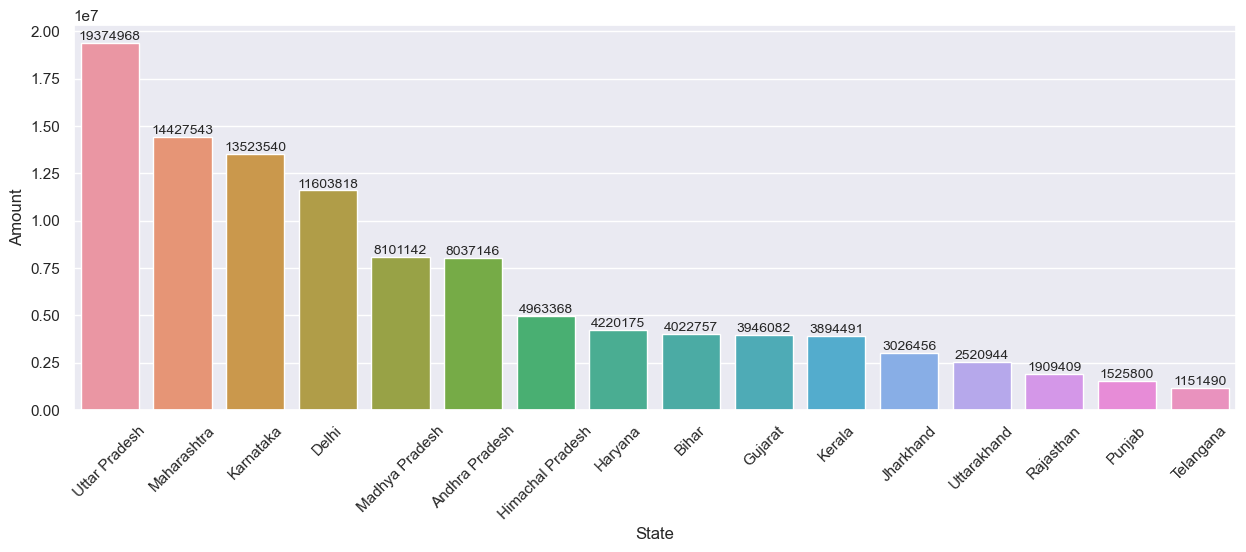

In [21]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
b = sns.barplot(data = sales_state, x = 'State', y = 'Amount')
for item in b.get_xticklabels():
    item.set_rotation(45)
for bars in b.containers: #To get the value-labels in the plot
    b.bar_label(bars, fontsize='10', fmt='%d')

#### insight : From above graphs we can see that unexpectedly most of the orders are from Uttar Pradesh, Maharashtra and Karnataka.

### Marital Status

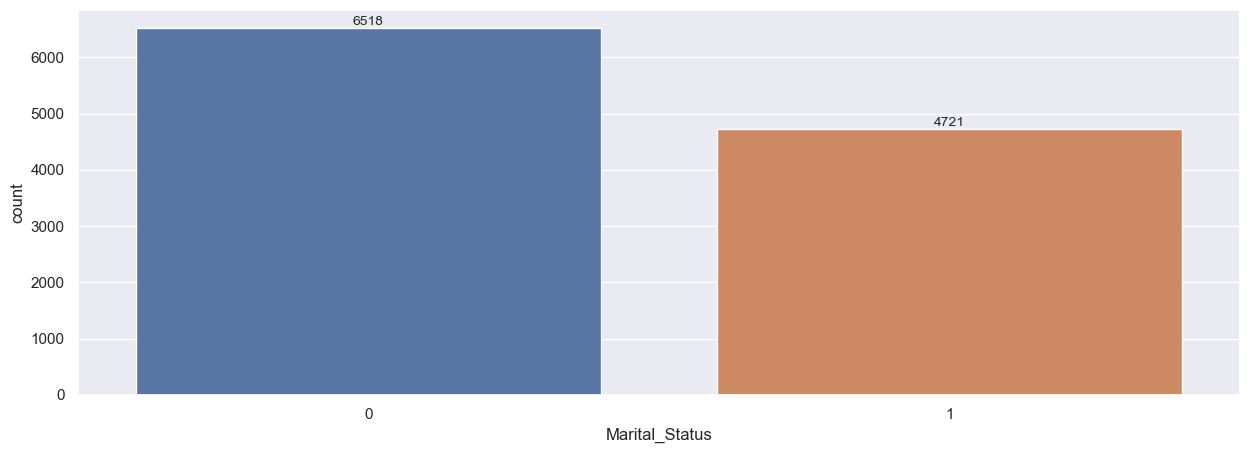

In [22]:
ax = sns.countplot(data = df, x= 'Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})

for bars in ax.containers: #To get the value-labels in the plot
    ax.bar_label(bars, fontsize='10', fmt='%d')

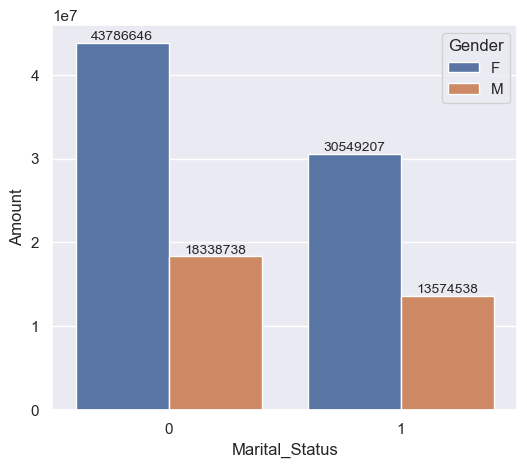

In [23]:
sales_data = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
b= sns.barplot(data = sales_data, x='Marital_Status', y='Amount', hue='Gender')
for bars in b.containers: #To get the value-labels in the plot
    b.bar_label(bars, fontsize='10', fmt='%d')

#### Insight : From above graph we can conclude that most of the buyers are married(women) and they have a high purchasing power

### Occupation

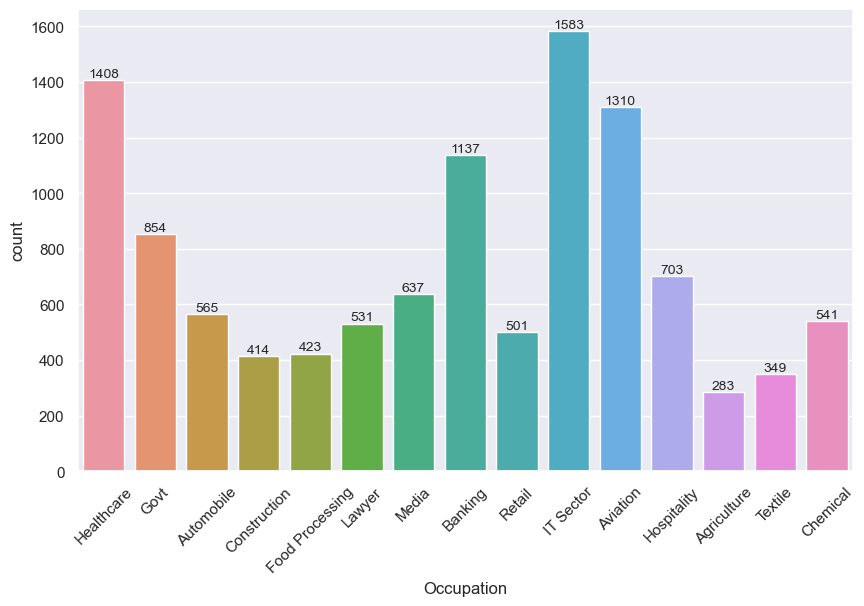

In [24]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.countplot(data = df, x= 'Occupation')

for bars in ax.containers: #To get the value-labels in the plot
    ax.bar_label(bars, fontsize='10', fmt='%d')
    
for item in ax.get_xticklabels():
    item.set_rotation(45)

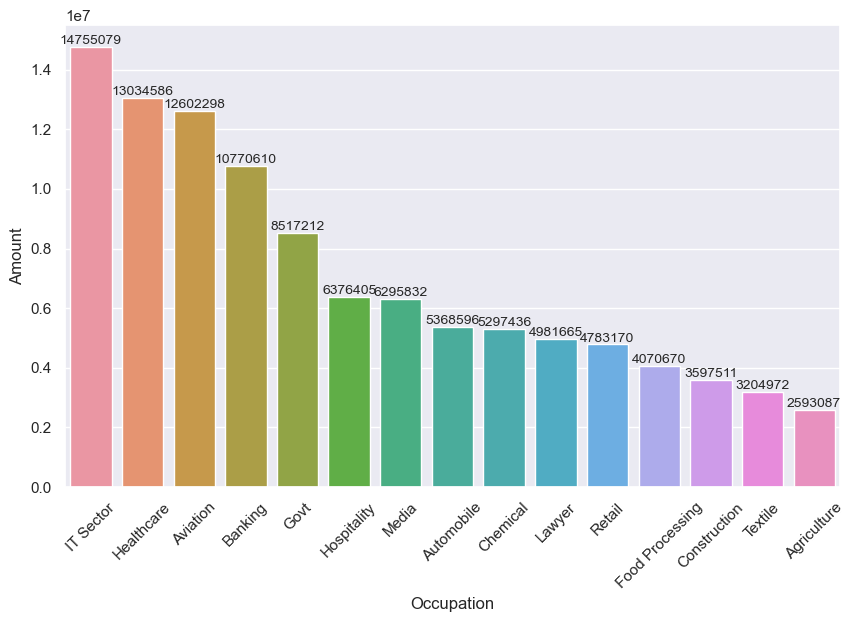

In [25]:
sales_data = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

    
ax = sns.barplot(data = sales_data, x = 'Occupation', y = 'Amount')

for bars in ax.containers: #To get the value-labels in the plot
    ax.bar_label(bars, fontsize='10', fmt='%d')
    
for item in ax.get_xticklabels():
    item.set_rotation(45)

#### Insight : From the above graphs, we can see that the buyers are working in IT, Aviation and HealthCare sectors.

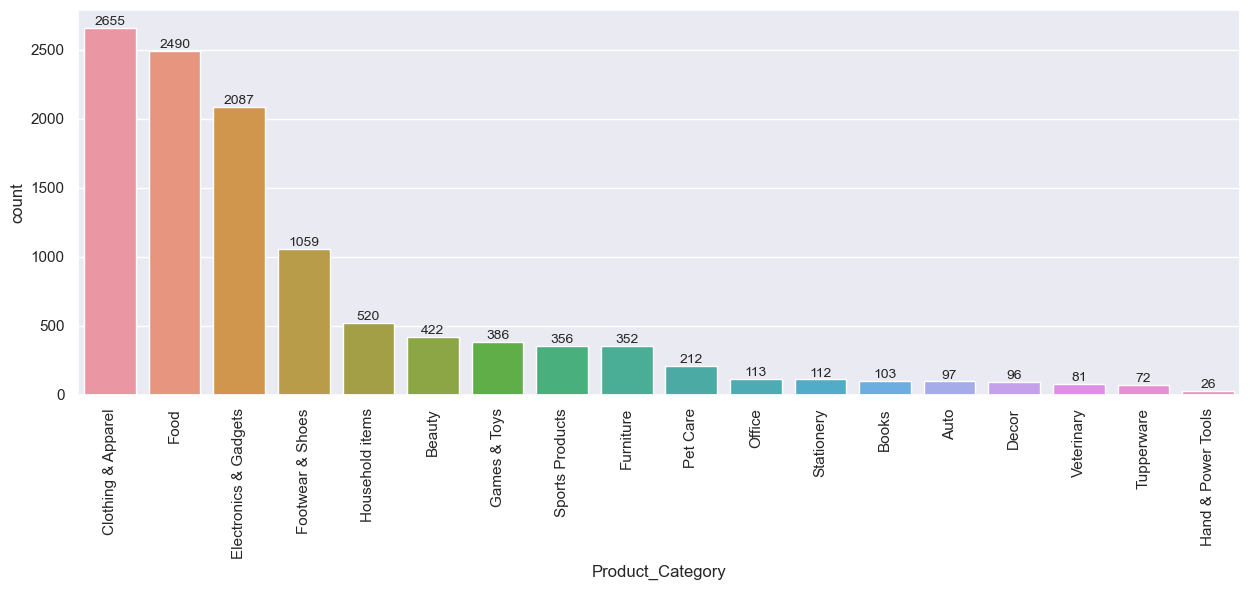

In [26]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(data = df,x = 'Product_Category', order = df['Product_Category'].value_counts().index)

for bars in ax.containers: #To get the value-labels in the plot
    ax.bar_label(bars, fontsize='10', fmt='%d')
    
for item in ax.get_xticklabels():
    item.set_rotation(90)

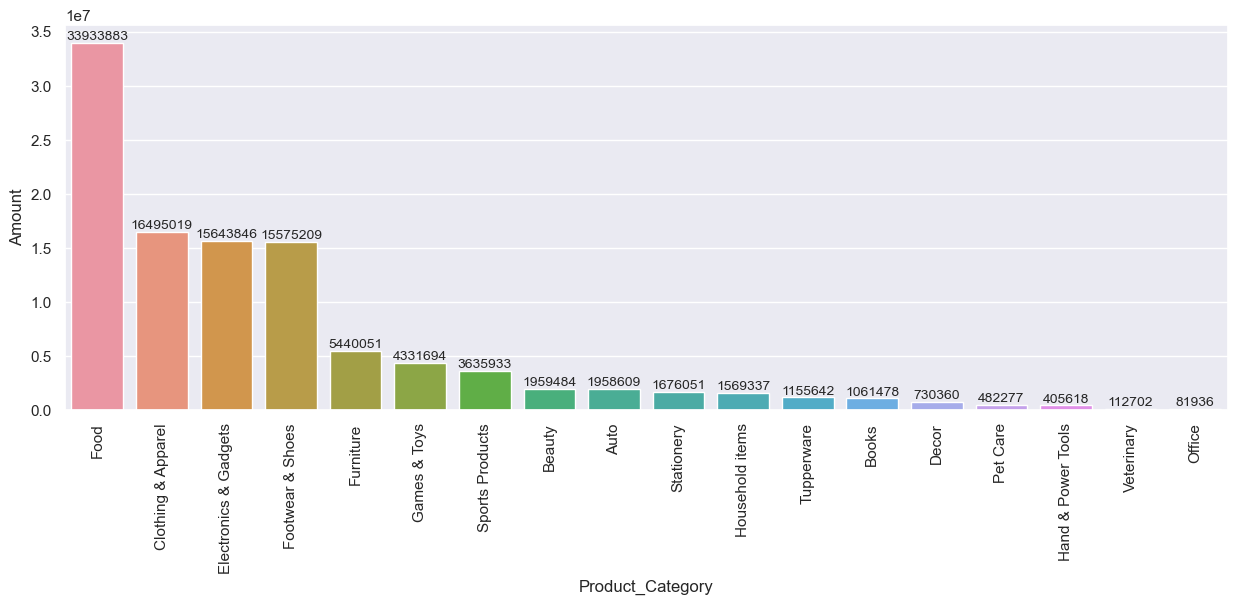

In [27]:
sales_data = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

    
ax = sns.barplot(data = sales_data, x = 'Product_Category', y = 'Amount')

for bars in ax.containers: #To get the value-labels in the plot
    ax.bar_label(bars, fontsize='10', fmt='%d')
    
for item in ax.get_xticklabels():
    item.set_rotation(90)

#### Insight : From the above graphs we can see that most of the sold products are from Food, Clothing and Electronics and Gadgets

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

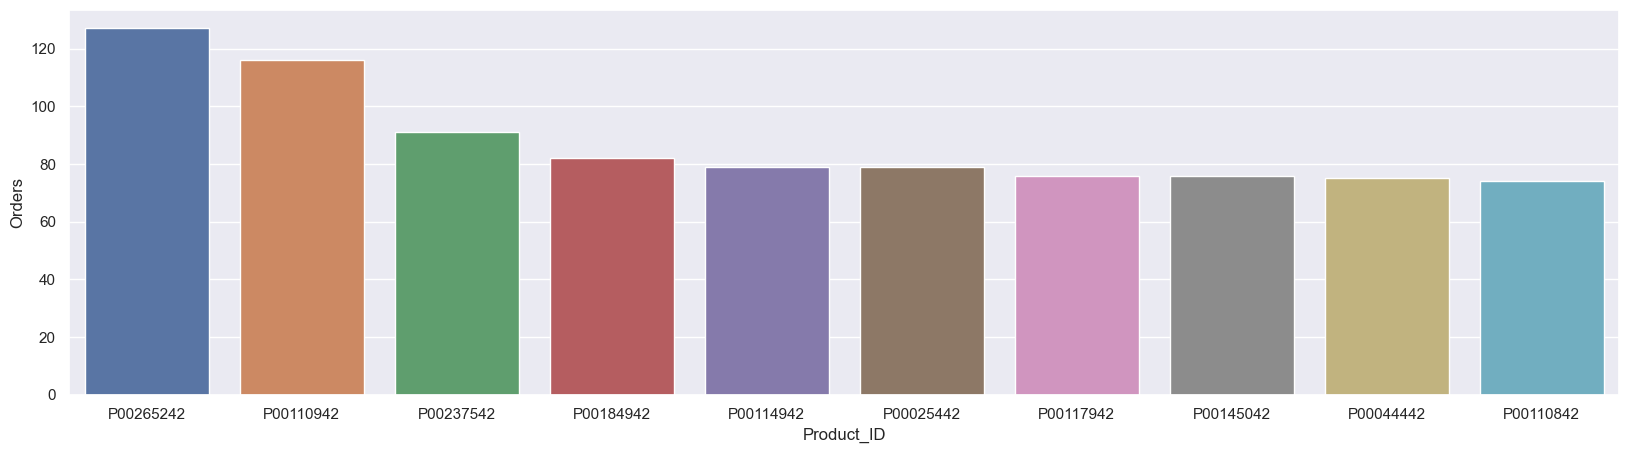

In [28]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

### Conclusion :
#### Married Women of age group 26-35 from UP, Maharashtra and Karnataka mainly working in IT, Health Care and Aviation are more likely to buy products in categories as Food, Clothing and Electronics and Gadgets.

### Customer Analysis

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [30]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [31]:
duplicate_values = df['User_ID'].duplicated()
print(duplicate_values.value_counts())

True     7487
False    3752
Name: User_ID, dtype: int64


### Top 10 Customers with most orders

In [32]:
#top 10 customers
top_10 = df.groupby(['User_ID','Cust_name'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

In [33]:
top_10

,User_ID,Cust_name,Orders
1046,1001680,Vasudev,58
2136,1003476,Lalita,57
2357,1003808,Vishakha,55
1198,1001941,Gopal,52
3750,1006036,Halladay,52
2899,1004682,Vishakha,51
1630,1002665,Champaklata,50
2918,1004725,Jackson,50
2743,1004425,Indulekha,48
274,1000424,Sudevi,48


### Bottom 10 Customers with least orders

In [34]:
#bottom 10 customers
bottom_10 = df.groupby(['User_ID','Cust_name'], as_index=False)['Orders'].sum().sort_values(by='Orders').head(10)
bottom_10

,User_ID,Cust_name,Orders
0,1000001,Chris,1
2952,1004782,Philippe,1
2951,1004781,Soltero,1
2949,1004779,Ishpreet,1
853,1001364,D'Ascenzo,1
2948,1004777,Beltran,1
2933,1004744,Pardue,1
874,1001398,Workman,1
876,1001401,Clasen,1
887,1001421,Fjeld,1


### Top 10 Customers with most money spent

In [35]:
#top 10 customers
top_10 = df.groupby(['User_ID','Cust_name'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
top_10

,User_ID,Cust_name,Amount
1046,1001680,Vasudev,281034
1198,1001941,Gopal,239147
2136,1003476,Lalita,220435
1630,1002665,Champaklata,201104
2357,1003808,Vishakha,197660
2743,1004425,Indulekha,194343
2228,1003618,Keshav,189921
274,1000424,Sudevi,187679
2899,1004682,Vishakha,185122
808,1001298,Siddharth,184045


### Bottom 10 Customers with least money spent

In [36]:
#bottom 10 customers
bottom_10 = df.groupby(['User_ID','Cust_name'], as_index=False)['Amount'].sum().sort_values(by='Amount').head(10)
bottom_10

,User_ID,Cust_name,Amount
3255,1005258,Aromal,567
2715,1004378,Kritika,572
966,1001542,Buch,574
2649,1004268,Rosenblatt,580
2217,1003606,Meg,582
1111,1001782,Cunningham,697
506,1000814,Hwang,739
142,1000215,Bryan,759
3194,1005158,Waldorf,761
2444,1003948,Shaun,762
